# Сверточная нейронная сеть

In [1]:
import torch
import torch.nn.functional as F
import torchvision
import os
from torch import nn
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cv2
import sklearn
import PIL
import torch
import torchvision
from matplotlib import cm
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [2]:
transform = torchvision.transforms.Compose(
    [
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize((0.1307,), (0.3081,))
    ]
)

In [3]:
def seed_everything(seed):
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False


In [4]:
seed_everything(42)

mnist_train = torchvision.datasets.MNIST(
    './mnist/',
    train=True,
    download=True,
    transform=transform
)

mnist_val = torchvision.datasets.MNIST(
    './mnist/',
    train=False,
    download=True,
    transform=transform
)

train_dataloader = torch.utils.data.DataLoader(mnist_train, batch_size=64, shuffle=True)
val_dataloader = torch.utils.data.DataLoader(mnist_val, batch_size=64, shuffle=True)

100%|██████████| 9.91M/9.91M [00:00<00:00, 58.8MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.70MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 14.5MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.91MB/s]


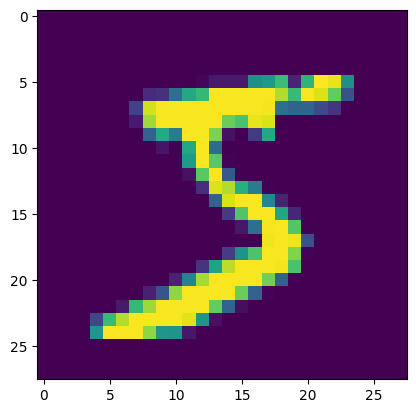

In [5]:
plt.imshow(mnist_train[0][0].squeeze(0).numpy().reshape([28, 28]))

In [6]:
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(28*28, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [7]:
def train(model, optimizer, n_epochs=5):
    for epoch in range(n_epochs):

        # обучение
        for x_train, y_train in tqdm(train_dataloader):
            y_pred = model(x_train)
            loss = F.cross_entropy(y_pred, y_train)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        # валидация
        if epoch % 2 == 0:
            val_loss = []
            val_accuracy = []
            with torch.no_grad():
                for x_val, y_val in tqdm(val_dataloader):
                    y_pred = model(x_val)
                    loss = F.cross_entropy(y_pred, y_val)
                    val_loss.append(loss.numpy())
                    val_accuracy.extend((torch.argmax(y_pred, dim=-1) == y_val).numpy().tolist())

            print(f'Epoch: {epoch}, loss: {np.mean(val_loss)}, accuracy: {np.mean(val_accuracy)}')

In [8]:
train(model, optimizer)

100%|██████████| 157/157 [00:02<00:00, 73.41it/s]


Epoch: 0, loss: 0.3203020393848419, accuracy: 0.9099


100%|██████████| 157/157 [00:02<00:00, 74.60it/s]


Epoch: 2, loss: 0.23288460075855255, accuracy: 0.9315


100%|██████████| 157/157 [00:02<00:00, 75.82it/s]

Epoch: 4, loss: 0.18698137998580933, accuracy: 0.9462


In [9]:
0.9462

0.9462

In [10]:
model = nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=10, kernel_size=5),  # grayscale
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=4),   # сократим изображение в 4 раза по каждой из сторон
    nn.Flatten(),
    nn.Linear(6*6*10, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [11]:
train(model, optimizer)

100%|██████████| 157/157 [00:02<00:00, 65.90it/s]


Epoch: 0, loss: 0.26599037647247314, accuracy: 0.925


100%|██████████| 157/157 [00:02<00:00, 66.00it/s]


Epoch: 2, loss: 0.12708856165409088, accuracy: 0.9624


100%|██████████| 157/157 [00:02<00:00, 65.61it/s]

Epoch: 4, loss: 0.0859842449426651, accuracy: 0.9748


In [12]:
0.9747

0.9747

# Домашнее задание

Обучите сверточную нейронную сеть на датасете MNIST, взяв любой другой оптимизатор (кроме SGD) и любую другую функцию ошибки (кроме cross-entropy loss). Попробуйте поварьировать параметры: кол-во ядер, `kernel_size` и побить текущий бейзлайн в `0.9747`. Выведите количество обучаемых параметров.    
Какого качества удалось достичь? Попробуйте залоггировать Ваши результаты - построить графики того, как менялись метрики качества (accuracy, loss) с течением эпох, включить логгирование, сравнить результаты между собой при разных параметрах.

Любые дополнительные улучшения (как по методам, так и по коду пайплайна) приветствуются!

*Цель:* выработать навык обучения нейронных сетей (в частности сверточных) на основе средств PyTorch, начиная от загрузки датасетами и заканчивая выводами результатов, их логгированием, сравнением и анализом.

In [13]:
import torch
import torch.nn.functional as F
import torchvision
import os
from torch import nn
from tqdm import tqdm

In [14]:
transform = torchvision.transforms.Compose(
    [
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize((0.1307,), (0.3081,))
    ]
)

In [15]:
def seed_everything(seed):
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False


In [16]:
seed_everything(42)

mnist_train = torchvision.datasets.MNIST(
    './mnist/',
    train=True,
    download=True,
    transform=transform
)

mnist_val = torchvision.datasets.MNIST(
    './mnist/',
    train=False,
    download=True,
    transform=transform
)

train_dataloader = torch.utils.data.DataLoader(mnist_train, batch_size=64, shuffle=True)
val_dataloader = torch.utils.data.DataLoader(mnist_val, batch_size=64, shuffle=True)

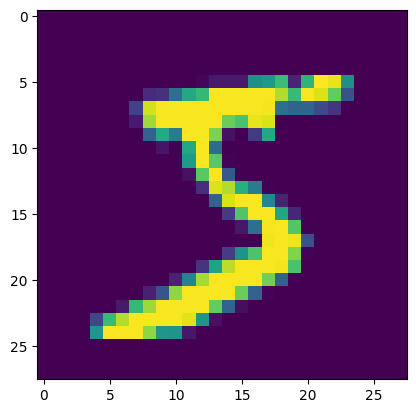

In [17]:
plt.imshow(mnist_train[0][0].squeeze(0).numpy().reshape([28, 28]))

In [18]:
model = nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=10, kernel_size=5),  # grayscale
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=4),   # сократим изображение в 4 раза по каждой из сторон
    nn.Flatten(),
    nn.Linear(6*6*10, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [19]:
def mse_loss(output, target):
    target_onehot = F.one_hot(target, num_classes=10).float()
    return F.mse_loss(output, target_onehot)

In [20]:
def train(model, optimizer, n_epochs=10):
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []
    
    print(f"Количество обучаемых параметров: {sum(p.numel() for p in model.parameters() if p.requires_grad):,}")
    
    for epoch in range(n_epochs):
        model.train()
        epoch_loss = 0.0
        epoch_correct = 0
        epoch_total = 0
        
        for x_train, y_train in tqdm(train_dataloader, desc=f"Epoch {epoch+1}/{n_epochs}"):
            y_pred = model(x_train)
            loss = mse_loss(y_pred, y_train)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            epoch_loss += loss.item()
            _, predicted = torch.max(y_pred.data, 1)
            epoch_total += y_train.size(0)
            epoch_correct += (predicted == y_train).sum().item()
        
        train_accuracy = epoch_correct / epoch_total
        avg_train_loss = epoch_loss / len(train_dataloader)
        train_losses.append(avg_train_loss)
        train_accuracies.append(train_accuracy)
        model.eval()
        val_loss = []
        val_accuracy = []
        
        with torch.no_grad():
            for x_val, y_val in val_dataloader:
                y_pred = model(x_val)
                loss = mse_loss(y_pred, y_val) 
                val_loss.append(loss.item())
                val_accuracy.extend((torch.argmax(y_pred, dim=-1) == y_val).cpu().numpy().tolist())
        
        avg_val_loss = np.mean(val_loss)
        avg_val_accuracy = np.mean(val_accuracy)
        val_losses.append(avg_val_loss)
        val_accuracies.append(avg_val_accuracy)
        print(f'Epoch {epoch+1}: loss: {avg_val_loss:.4f}, accuracy: {avg_val_accuracy:.4f}')
        
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss', marker='o')
    plt.plot(val_losses, label='Val Loss', marker='s')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid(True)
    
    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label='Train Accuracy', marker='o')
    plt.plot(val_accuracies, label='Val Accuracy', marker='s')
    plt.axhline(y=0.9747, color='r', linestyle='--', label='Baseline 0.9747')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    best_accuracy = max(val_accuracies)
    print(best_accuracy)
    return best_accuracy

Количество обучаемых параметров: 47,758


Epoch 1/10: 100%|██████████| 938/938 [00:18<00:00, 49.64it/s]


Epoch 1: loss: 0.0086, accuracy: 0.9777


Epoch 2/10: 100%|██████████| 938/938 [00:18<00:00, 50.02it/s]


Epoch 2: loss: 0.0067, accuracy: 0.9819


Epoch 3/10: 100%|██████████| 938/938 [00:18<00:00, 49.70it/s]


Epoch 3: loss: 0.0057, accuracy: 0.9848


Epoch 4/10: 100%|██████████| 938/938 [00:18<00:00, 49.58it/s]


Epoch 4: loss: 0.0053, accuracy: 0.9869


Epoch 5/10: 100%|██████████| 938/938 [00:18<00:00, 49.70it/s]


Epoch 5: loss: 0.0056, accuracy: 0.9858


Epoch 6/10: 100%|██████████| 938/938 [00:19<00:00, 49.26it/s]


Epoch 6: loss: 0.0048, accuracy: 0.9880


Epoch 7/10: 100%|██████████| 938/938 [00:19<00:00, 49.21it/s]


Epoch 7: loss: 0.0044, accuracy: 0.9870


Epoch 8/10: 100%|██████████| 938/938 [00:18<00:00, 49.47it/s]


Epoch 8: loss: 0.0044, accuracy: 0.9886


Epoch 9/10: 100%|██████████| 938/938 [00:19<00:00, 49.34it/s]


Epoch 9: loss: 0.0041, accuracy: 0.9891


Epoch 10/10: 100%|██████████| 938/938 [00:18<00:00, 49.43it/s]


Epoch 10: loss: 0.0040, accuracy: 0.9896


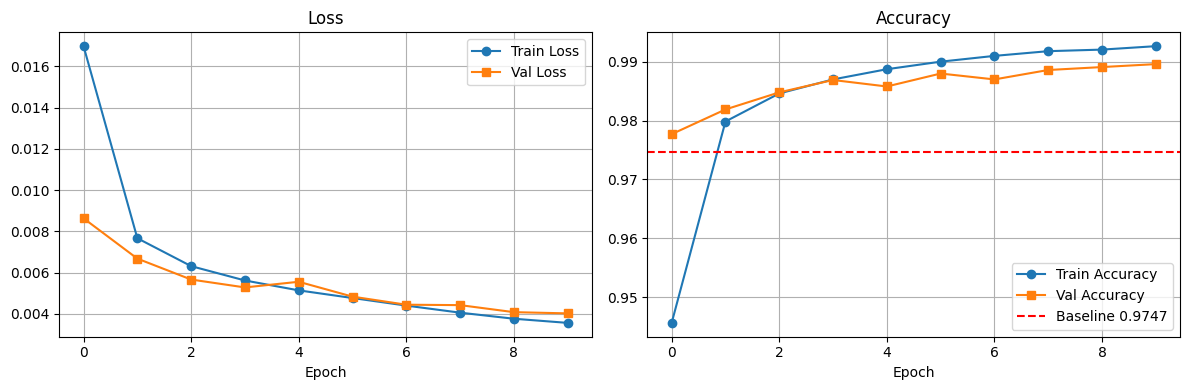

0.9896


0.9896

In [21]:
train(model, optimizer)